In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\ELCOT\Downloads\sales\Sales Data.csv', encoding= 'unicode_escape')

In [6]:
df.shape

(185950, 11)

In [7]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [9]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [10]:
df.drop(['Unnamed: 0'] ,axis = 1 , inplace = True)

In [11]:
df.shape

(185950, 10)

## Exploratory Data Analysis

### Product

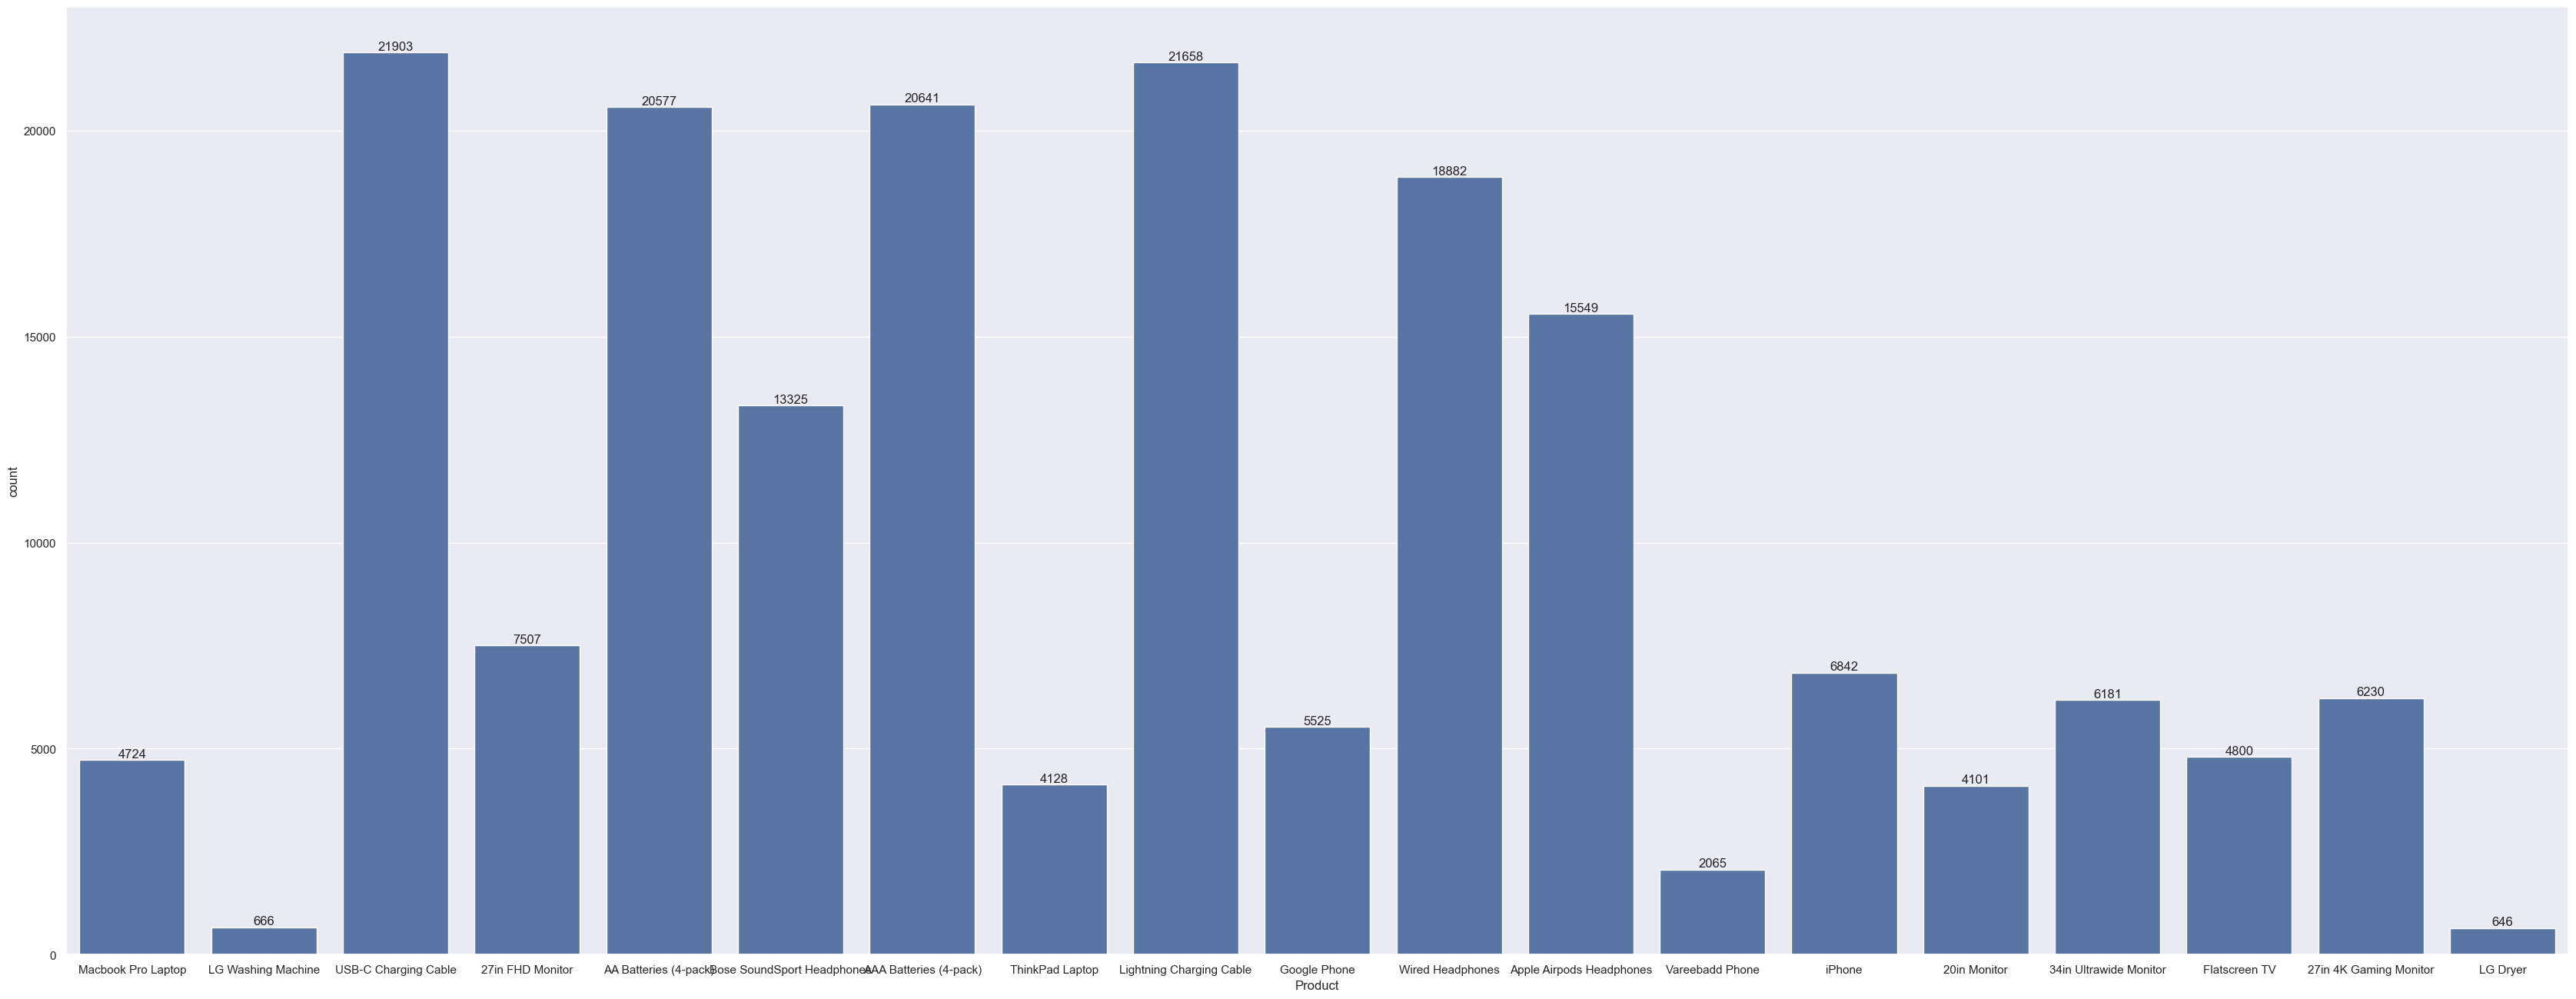

In [18]:
ax = sns.countplot(x = 'Product',data = df)
sns.set(rc={'figure.figsize':(38,16)})
for bars in ax.containers:
    ax.bar_label(bars)

### Product by Sales

<Axes: xlabel='Product', ylabel='Sales'>

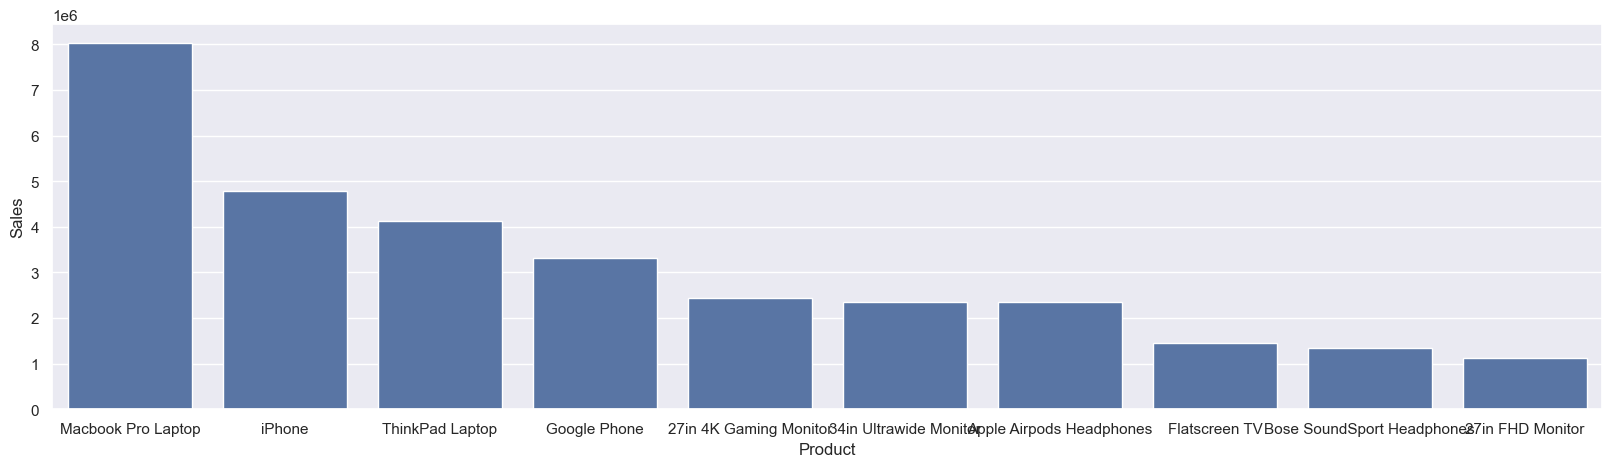

In [19]:
pdt_sales = df.groupby(['Product'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = pdt_sales, x = 'Product',y= 'Sales')

### Sales By Month 

<Axes: xlabel='Month', ylabel='Sales'>

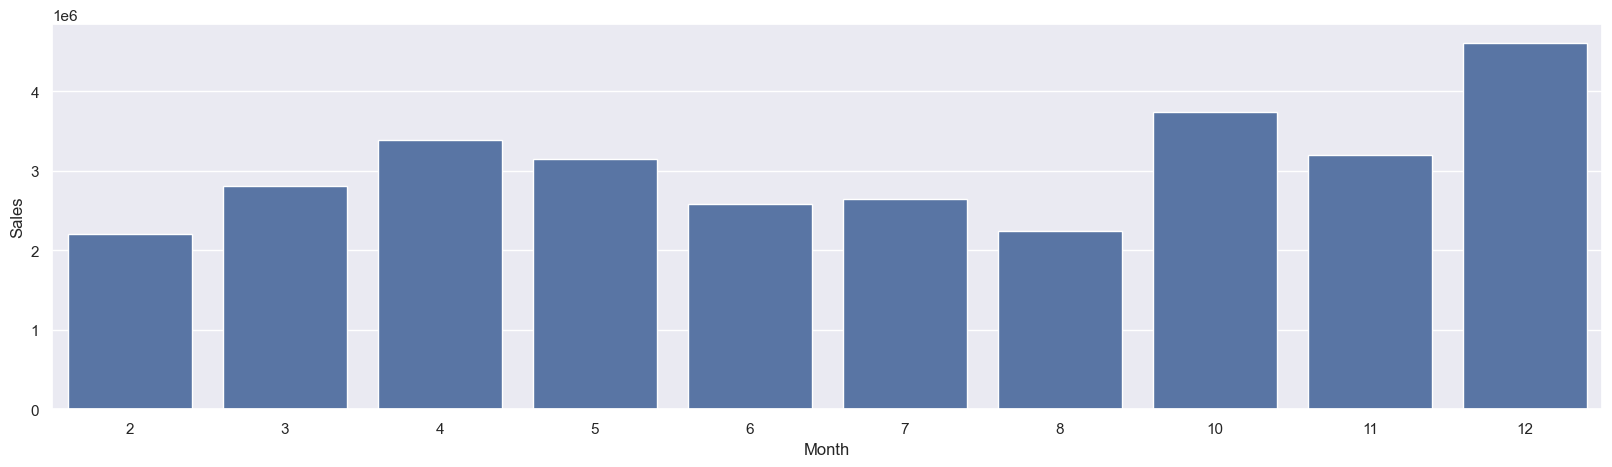

In [20]:
month_sales = df.groupby(['Month'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = month_sales, x = 'Month',y= 'Sales')

### Sales by City

<Axes: xlabel='City', ylabel='Sales'>

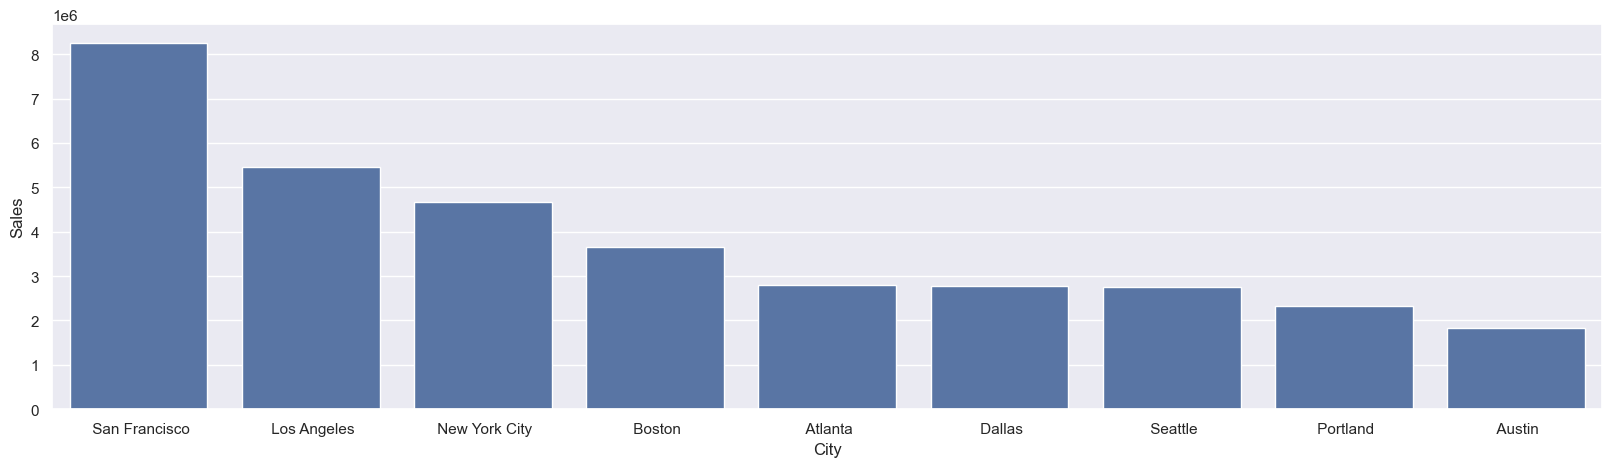

In [21]:
city_sales = df.groupby(['City'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = city_sales, x = 'City',y= 'Sales')

### Aggregate by Product

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: City, dtype: int64


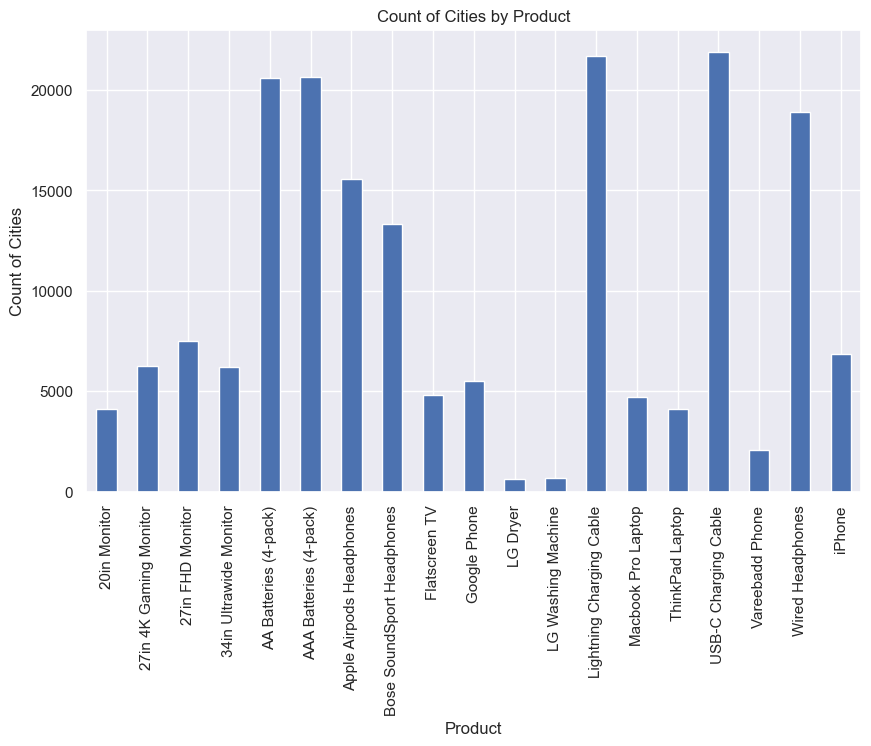

In [25]:
aggregated_data = df.groupby('Product')['City'].count()
print(aggregated_data)
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Count of Cities')
plt.title('Count of Cities by Product')
plt.show()

<Axes: xlabel='Product', ylabel='Quantity Ordered'>

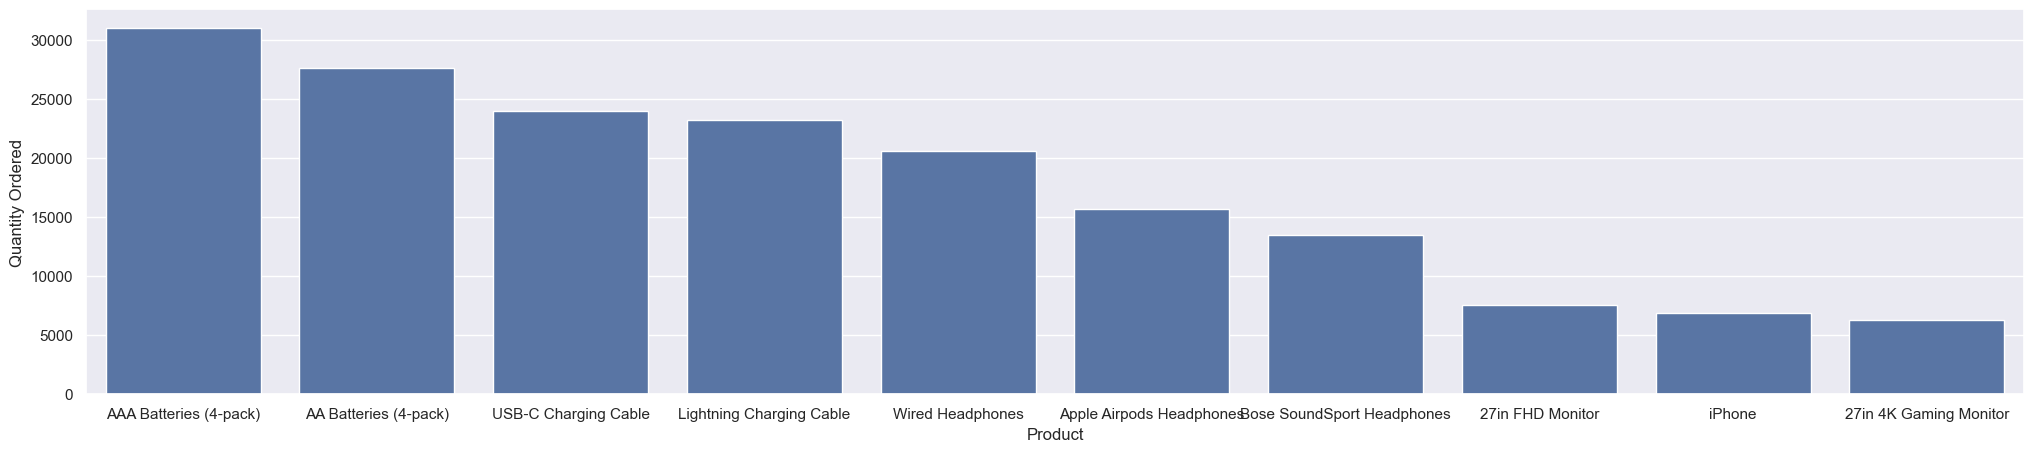

In [27]:
pdt_sales = df.groupby(['Product'], as_index=False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = pdt_sales, x = 'Product',y= 'Quantity Ordered')